# 0.데이터 로드

In [1]:
# 드라이브 사용 설정
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 데이터 로드
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/dacon.io/suwon/5회차/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/dacon.io/suwon/5회차/data/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/dacon.io/suwon/5회차/data/sample_submission.csv')

In [5]:
submission.head(3)

,date_time,number_of_rentals
0,2021-04-01,0
1,2021-04-02,0
2,2021-04-03,0


In [6]:
# 평균값 넣어보기
submission['number_of_rentals'] = train['number_of_rentals'].mean()
submission

,date_time,number_of_rentals
0,2021-04-01,59574.978022
1,2021-04-02,59574.978022
2,2021-04-03,59574.978022
3,2021-04-04,59574.978022
4,2021-04-05,59574.978022
...,...,...
86,2021-06-26,59574.978022
87,2021-06-27,59574.978022
88,2021-06-28,59574.978022
89,2021-06-29,59574.978022


In [7]:
# 정답파일 저장 / 제출
submission.to_csv('submission.csv', index = False)

# 1. 데이터 살펴보기

In [8]:
train.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833


In [9]:
test.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability
0,2021-04-01,108.833,3.000,0.000,2.900,28.333,11.800,20.667,18.333
1,2021-04-02,116.717,3.850,0.000,2.662,46.417,12.000,19.000,28.500
2,2021-04-03,82.669,4.000,0.565,2.165,77.258,8.875,16.368,52.847
3,2021-04-04,44.123,3.466,0.466,3.747,63.288,6.250,17.368,37.671
4,2021-04-05,147.791,1.500,0.000,1.560,48.176,7.188,18.684,4.459


In [11]:
submission

,date_time,number_of_rentals
0,2021-04-01,59574.978022
1,2021-04-02,59574.978022
2,2021-04-03,59574.978022
3,2021-04-04,59574.978022
4,2021-04-05,59574.978022
...,...,...
86,2021-06-26,59574.978022
87,2021-06-27,59574.978022
88,2021-06-28,59574.978022
89,2021-06-29,59574.978022


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date_time                  273 non-null    object 
 1   wind_direction             273 non-null    float64
 2   sky_condition              273 non-null    float64
 3   precipitation_form         273 non-null    float64
 4   wind_speed                 273 non-null    float64
 5   humidity                   273 non-null    float64
 6   low_temp                   273 non-null    float64
 7   high_temp                  273 non-null    float64
 8   Precipitation_Probability  273 non-null    float64
 9   number_of_rentals          273 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 21.5+ KB


In [13]:
train.shape

(273, 10)

# 2. 데이터 처리

## Feature Engineering

In [14]:
#drop() 메소드를 이용하여 열(date_time) 제거
train = train.drop(['date_time'], axis = 1)
test = test.drop(['date_time'], axis = 1)

In [15]:
train.head()

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
0,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994
1,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139
2,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817
3,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034
4,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833


## 2.2. Feature Selection

In [16]:
# 독립변수 = Feature = X
# 종속변수 = Target = y

#학습에 사용할 변수 X를 할당
X = train[['wind_direction', 'sky_condition', 'precipitation_form', 'wind_speed',
           'humidity', 'low_temp', 'high_temp', 'Precipitation_Probability']]

# X 데이터 확인
X.head()

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability
0,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000
1,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500
2,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113
3,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493
4,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378


In [17]:
train.columns

Index(['wind_direction', 'sky_condition', 'precipitation_form', 'wind_speed',
       'humidity', 'low_temp', 'high_temp', 'Precipitation_Probability',
       'number_of_rentals'],
      dtype='object')

In [20]:
# y 할당
y = train['number_of_rentals']

# y 데이터 확인
y.head()

0    22994
1    28139
2    26817
3    26034
4     2833
Name: number_of_rentals, dtype: int64

# 3. 모델링

## 3.1. 모델 선택

In [21]:
from sklearn.tree import DecisionTreeRegressor

#모델 선언
model = DecisionTreeRegressor()

## 3.2. 모델 학습

In [22]:
#모델 학습
model.fit(X,y)

DecisionTreeRegressor()

## 3.3. 예측

In [23]:
predict = model.predict(test)

In [24]:
print('------예측된 데이터 상위 10개의 값 확인------')
print(predict[:10])

------예측된 데이터 상위 10개의 값 확인------
[88257.  8095. 25902. 24560. 65124. 75637. 68414. 74856. 73647. 83970.]


# 4. 데이콘 제출하기

In [30]:
submission['number_of_rentals'] = predict

submission.head()

,date_time,number_of_rentals
0,2021-04-01,88257.0
1,2021-04-02,8095.0
2,2021-04-03,25902.0
3,2021-04-04,24560.0
4,2021-04-05,65124.0


In [31]:
submission.to_csv('submission2.csv', index =False)

## predict 시각화

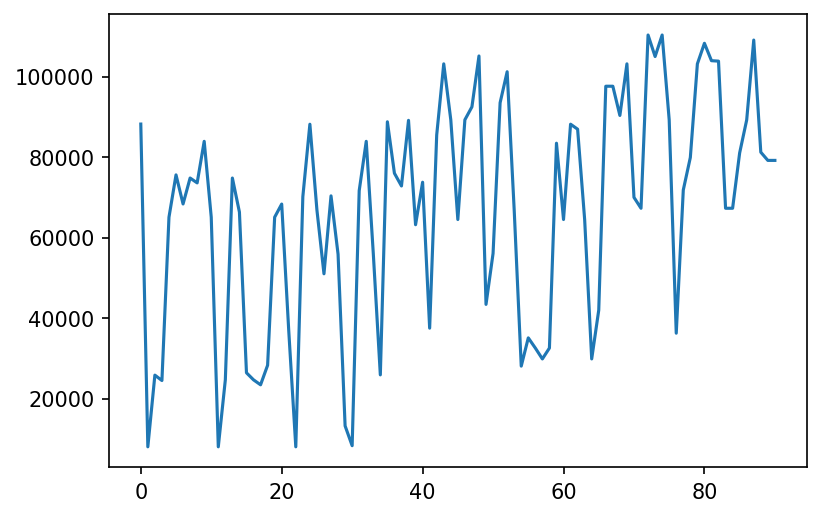

In [33]:
import matplotlib.pyplot as plt

plt.figure(dpi = 150)
plt.plot(predict)
plt.show()